In [58]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_excel('AirQualityUCI.xlsx')

In [8]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [10]:
df.shape

(9357, 15)

In [20]:
X = df.drop(['Date','Time','AH'],axis=1)

In [21]:
X.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001


In [24]:
X.shape

(9357, 12)

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 877.3 KB


In [22]:
y = df['AH']

In [23]:
y[0:5]

0    0.757754
1    0.725487
2    0.750239
3    0.786713
4    0.788794
Name: AH, dtype: float64

#Correlation

In [27]:
import seaborn as sns
corr = X.corr()

In [28]:
corr

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
CO(GT),1.000000,0.041415,0.128351,-0.031377,0.029939,0.526450,-0.089981,0.671140,-0.073721,0.080316,-0.068952,-0.048231
PT08.S1(CO),0.041415,1.000000,0.170009,0.852659,0.933101,0.278029,0.086931,0.154058,0.845133,0.892436,0.754806,0.745344
NMHC(GT),0.128351,0.170009,1.000000,0.037329,0.110097,-0.004413,0.048832,0.103345,0.162689,0.101189,-0.000008,0.008288
C6H6(GT),-0.031377,0.852659,0.037329,1.000000,0.767401,-0.001163,0.512154,-0.010971,0.774649,0.641306,0.971370,0.925068
PT08.S2(NMHC),0.029939,0.933101,0.110097,0.767401,1.000000,0.331331,-0.073748,0.176569,0.874761,0.909909,0.668984,0.585775
NOx(GT),0.526450,0.278029,-0.004413,-0.001163,0.331331,1.000000,-0.436083,0.817138,0.035580,0.461916,-0.138457,-0.053008
PT08.S3(NOx),-0.089981,0.086931,0.048832,0.512154,-0.073748,-0.436083,1.000000,-0.256217,0.122672,-0.208935,0.588061,0.573513
NO2(GT),0.671140,0.154058,0.103345,-0.010971,0.176569,0.817138,-0.256217,1.000000,-0.022092,0.253469,-0.084084,-0.081300
PT08.S4(NO2),-0.073721,0.845133,0.162689,0.774649,0.874761,0.035580,0.122672,-0.022092,1.000000,0.723670,0.755053,0.640685
PT08.S5(O3),0.080316,0.892436,0.101189,0.641306,0.909909,0.461916,-0.208935,0.253469,0.723670,1.000000,0.503659,0.524922


[Text(0.5, 0, 'CO(GT)'),
 Text(1.5, 0, 'PT08.S1(CO)'),
 Text(2.5, 0, 'NMHC(GT)'),
 Text(3.5, 0, 'C6H6(GT)'),
 Text(4.5, 0, 'PT08.S2(NMHC)'),
 Text(5.5, 0, 'NOx(GT)'),
 Text(6.5, 0, 'PT08.S3(NOx)'),
 Text(7.5, 0, 'NO2(GT)'),
 Text(8.5, 0, 'PT08.S4(NO2)'),
 Text(9.5, 0, 'PT08.S5(O3)'),
 Text(10.5, 0, 'T'),
 Text(11.5, 0, 'RH')]

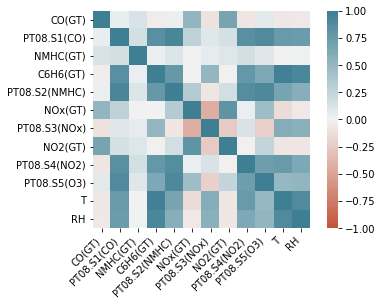

In [29]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

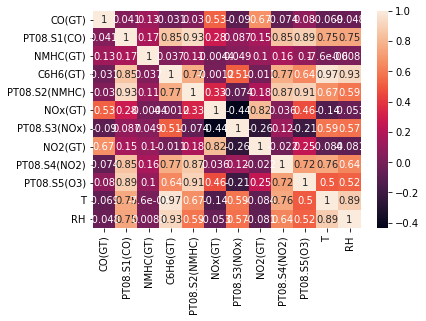

In [30]:
ax = sns.heatmap(corr, annot=True)

#outliers

In [31]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(X))
print(z)
print(z.shape)

[[0.4739999  0.94339273 2.21123554 ... 0.64029229 0.08850233 0.18337935]
 [0.46627322 0.73796482 1.93938293 ... 0.00591277 0.08155806 0.16043589]
 [0.46884878 1.07074288 1.76768654 ... 0.21678449 0.04915151 0.28296361]
 ...
 [0.47142434 0.28238484 0.29267014 ... 0.25618056 0.39636464 0.41266181]
 [0.467561   0.14059957 0.29267014 ... 0.44911861 0.4293499  0.50638818]
 [0.46884878 0.06634442 0.29267014 ... 0.34789258 0.43340073 0.51468687]]
(9357, 12)


In [32]:
threshold = 3
print(np.where(z > 3))

(array([  10,   11,   24, ..., 8777, 8777, 8777]), array([ 6,  6,  2, ...,  8, 10, 11]))


In [33]:
print(np.where(z < 3))

(array([   0,    0,    0, ..., 9356, 9356, 9356]), array([ 0,  1,  2, ...,  9, 10, 11]))


##Outliers: Correcting, Removing

In [34]:
X_o = X[(z < 3).all(axis=1)]
X_i = X[~((z < 3).all(axis=1))]

print("Original Dataset Shape: ",X.shape)
print("Outlier in the Dataset Shape: ",X_o.shape)
print("Without Outlier in the Dataset Shape: ",X_i.shape)

Original Dataset Shape:  (9357, 12)
Outlier in the Dataset Shape:  (8577, 12)
Without Outlier in the Dataset Shape:  (780, 12)


##Using IQR Score


In [36]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)


X_out = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]
X_in = X[((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]


print("Original Dataset Shape: ",X.shape)
print("Outlier in the Dataset Shape: ",X_out.shape)
print("Without Outlier in the Dataset Shape: ",X_in.shape)

Original Dataset Shape:  (9357, 12)
Outlier in the Dataset Shape:  (5463, 12)
Without Outlier in the Dataset Shape:  (3894, 12)


#Removing features with low variance

In [37]:

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

X.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001


In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 877.3 KB


#Train and Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7485, 12) (1872, 12) (7485,) (1872,)


# Get score using original model

In [40]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train,y_train)

scores = cross_val_score(reg, X_train, y_train, cv=10)
print('CV accuracy (original): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

CV accuracy (original): 0.999 +/- 0.000


#Ordinary Least Squares

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm

model_train = sm.OLS(y_train, X_train)
results_train = model_train.fit()
print(results_train.summary())


                                 OLS Regression Results                                
Dep. Variable:                     AH   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          8.084e+05
Date:                Sun, 23 Jan 2022   Prob (F-statistic):                        0.00
Time:                        07:05:09   Log-Likelihood:                         -11335.
No. Observations:                7485   AIC:                                  2.269e+04
Df Residuals:                    7473   BIC:                                  2.278e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

#Polynomial Regression

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

degree = 1
poly_features = PolynomialFeatures(degree=degree)
 
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
  
print(X_train_poly.shape,y_train.shape)  
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_train_pred = poly_model.predict(X_train_poly)

print("Metrics on Train samples")
print("==============================================================")
print("Multiple Regression score: ",r2_score(y_train,y_train_pred))
print("Multiple Regression mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
print("==============================================================")

y_test_pred = poly_model.predict(X_test_poly)

print("Metrics on Test samples")
print("==============================================================")
print("Multiple Regression score: ",r2_score(y_test,y_test_pred))
print("Multiple Regression mean_squared_error: ",mean_squared_error(y_test,y_test_pred))
print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_test,y_test_pred))
print("==============================================================")
 

(7485, 13) (7485,)
Metrics on Train samples
Multiple Regression score:  0.999333566990804
Multiple Regression mean_squared_error:  1.016381407363815
Multiple Regression mean_absolute_error:  0.7430699504333376
Metrics on Test samples
Multiple Regression score:  0.9993159428345
Multiple Regression mean_squared_error:  1.0224287679030255
Multiple Regression mean_absolute_error:  0.7439265124057473


#Linear Models

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor

In [50]:
linear_Models = [LinearRegression(),ElasticNet(),Lasso(),Ridge(),Lars(n_nonzero_coefs=1),SGDRegressor(max_iter=1000, tol=1e-3)]

In [51]:
for mod in range(len(linear_Models)):
  model = linear_Models[mod]
  #print(model)
  
  model.fit(X_train,y_train)

  print("Metrics on Train samples")
  print("==============================================================")
  print("Multiple Regression score: ",r2_score(y_train,y_train_pred))
  print("Multiple Regression mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
  print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
  print("==============================================================")

  y_test_pred = model.predict(X_test)

  print("Metrics on Test samples")
  print("==============================================================")
  print("Multiple Regression score: ",r2_score(y_test,y_test_pred))
  print("Multiple Regression mean_squared_error: ",mean_squared_error(y_test,y_test_pred))
  print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_test,y_test_pred))
  print("==============================================================")

Metrics on Train samples
Multiple Regression score:  0.999333566990804
Multiple Regression mean_squared_error:  1.016381407363815
Multiple Regression mean_absolute_error:  0.7430699504333376
Metrics on Test samples
Multiple Regression score:  0.9993159428345
Multiple Regression mean_squared_error:  1.0224287679030157
Multiple Regression mean_absolute_error:  0.7439265124057546
Metrics on Train samples
Multiple Regression score:  0.999333566990804
Multiple Regression mean_squared_error:  1.016381407363815
Multiple Regression mean_absolute_error:  0.7430699504333376
Metrics on Test samples
Multiple Regression score:  0.9993141838660017
Multiple Regression mean_squared_error:  1.0250578171773583
Multiple Regression mean_absolute_error:  0.7614329978675431
Metrics on Train samples
Multiple Regression score:  0.999333566990804
Multiple Regression mean_squared_error:  1.016381407363815
Multiple Regression mean_absolute_error:  0.7430699504333376
Metrics on Test samples
Multiple Regression sc

#Algorithm Models

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [53]:
Alg_Model_list = [KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [61]:
for mod in range(len(Alg_Model_list)):
  model = Alg_Model_list[mod]
  print(model)
  
  model.fit(X_train,y_train)

  y_train_pred = model.predict(X_train)
  print("Model Used : ",model)
  print("Metrics on Train samples")
  print("==============================================================")
  print("Multiple Regression score: ",r2_score(y_train,y_train_pred))
  print("Multiple Regression mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
  print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
  print("==============================================================")

  y_test_pred = model.predict(X_test)

  print("Metrics on Test samples")
  print("==============================================================")
  print("Multiple Regression score: ",r2_score(y_test,y_test_pred))
  print("Multiple Regression mean_squared_error: ",mean_squared_error(y_test,y_test_pred))
  print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_test,y_test_pred))
  print("==============================================================")

KNeighborsRegressor()
Model Used :  KNeighborsRegressor()
Metrics on Train samples
Multiple Regression score:  0.9999934864134153
Multiple Regression mean_squared_error:  0.009933914149774728
Multiple Regression mean_absolute_error:  0.06740271457375605
Metrics on Test samples
Multiple Regression score:  0.9999903252374572
Multiple Regression mean_squared_error:  0.014460422381706164
Multiple Regression mean_absolute_error:  0.083231898328982
SVR()
Model Used :  SVR()
Metrics on Train samples
Multiple Regression score:  0.9981733717342091
Multiple Regression mean_squared_error:  2.785802896760492
Multiple Regression mean_absolute_error:  0.6340982613763587
Metrics on Test samples
Multiple Regression score:  0.9980267608753377
Multiple Regression mean_squared_error:  2.949309719651656
Multiple Regression mean_absolute_error:  0.654877142105676
DecisionTreeRegressor()
Model Used :  DecisionTreeRegressor()
Metrics on Train samples
Multiple Regression score:  1.0
Multiple Regression mean_s

#Ensemble Models

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import  XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [56]:
ensemble_Model_list = [RandomForestRegressor(),BaggingRegressor(),GradientBoostingRegressor(),XGBRegressor(),AdaBoostRegressor(),ExtraTreesRegressor()]

In [60]:
for mod in range(len(ensemble_Model_list)):
  model = ensemble_Model_list[mod]
  print(model)
  
  model.fit(X_train,y_train)

  y_train_pred = model.predict(X_train)
  
  print("Metrics on Train samples")
  print("==============================================================")
  print("Multiple Regression score: ",r2_score(y_train,y_train_pred))
  print("Multiple Regression mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
  print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
  print("==============================================================")

  y_test_pred = model.predict(X_test)

  print("Metrics on Test samples")
  print("==============================================================")
  print("Multiple Regression score: ",r2_score(y_test,y_test_pred))
  print("Multiple Regression mean_squared_error: ",mean_squared_error(y_test,y_test_pred))
  print("Multiple Regression mean_absolute_error: ",mean_absolute_error(y_test,y_test_pred))
  print("==============================================================")

RandomForestRegressor()
Metrics on Train samples
Multiple Regression score:  0.9999999789863652
Multiple Regression mean_squared_error:  3.204803399076439e-05
Multiple Regression mean_absolute_error:  0.0031605904174225974
Metrics on Test samples
Multiple Regression score:  0.9999998779097274
Multiple Regression mean_squared_error:  0.00018248271231167566
Multiple Regression mean_absolute_error:  0.007846201662707507
BaggingRegressor()
Metrics on Train samples
Multiple Regression score:  0.9999999556375258
Multiple Regression mean_squared_error:  6.765750404952139e-05
Multiple Regression mean_absolute_error:  0.0051670255396202265
Metrics on Test samples
Multiple Regression score:  0.9999998093266028
Multiple Regression mean_squared_error:  0.0002849907527564856
Multiple Regression mean_absolute_error:  0.010843232610533143
GradientBoostingRegressor()
Metrics on Train samples
Multiple Regression score:  0.99999836616298
Multiple Regression mean_squared_error:  0.002491775687686055
Mult